In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
data = pd.read_csv('/Users/phil/Documents/Capstone/Data/deadline_trades.csv')

In [4]:
data

,Unnamed: 0,index,Date,Team_A,Team_A_Acquires,Team_B,Team_B_Acquires,Team_C,Team_C_Acquires
0,0,32,2006-03-09,Arizona Coyotes,Yanick Lehoux,Los Angeles Kings,Tim Jackman,NaN,NaN
1,1,33,2006-03-09,Anaheim Ducks,Sean O'Donnell,Arizona Coyotes,Joel Perrault,NaN,NaN
2,2,34,2006-03-09,Florida Panthers,Richard Jackman,Pittsburgh Penguins,Petr Taticek,NaN,NaN
3,3,35,2006-03-09,Arizona Coyotes,Jamie Rivers,Detroit Red Wings,2006 7th round pick (ARI - #191 - Nick Oslund),NaN,NaN
4,4,36,2006-03-09,Chicago Blackhawks,2006 6th round pick (MTL - #169 - Chris Auger),Montreal Canadiens,Todd Simpson,NaN,NaN
...,...,...,...,...,...,...,...,...,...
913,913,320,2024-01-31,Calgary Flames,"Andrei Kuzmenko · $5,500,000$5,500,000$5,500,0...",Vancouver Canucks,"Elias Lindholm · $4,850,000$4,850,000$4,850,00...",NaN,NaN
914,914,321,2024-01-25,Minnesota Wild,"Will Butcher · $0$775,000$425,000 (AHL/JR)Sum:...",Pittsburgh Penguins,"Maxim Cajkovic · $0$850,833$70,000 (AHL/JR)Sum...",NaN,NaN
915,915,322,2024-01-11,Buffalo Sabres,Future ConsiderationsSum: $0$0$0Change: $0Chan...,Montreal Canadiens,"Filip Cederqvist · $0$850,000$70,000 (AHL/JR)S...",NaN,NaN
916,916,323,2024-01-08,Anaheim Ducks,Cutter Gauthier · $0$0$0 (AHL/JR) (Signing Rig...,Philadelphia Flyers,"Jamie Drysdale · $2,300,000$2,300,000$2,300,00...",NaN,NaN


In [6]:
all_stars = pd.read_csv("/Users/phil/Documents/Capstone_New/Data/NHL_AllStars_composite.csv")
all_stars

,Player,2000,2001,2002,2003,2004,2007,2008,2009,2011,...,2015,2016,2017,2018,2019,2020,2022,2023,2024,Count
0,Aaron Ekblad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,Adam Fox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2
2,Adam Pelech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1
3,Adrian Aucoin,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Adrian Kempe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Zach Parise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
378,Zach Werenski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2
379,Zdeno Chára,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
380,Zemgus Girgensons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [7]:
as_players = list(all_stars["Player"])

In [8]:
as_players

['Aaron Ekblad',
 'Adam Fox',
 'Adam Pelech',
 'Adrian Aucoin',
 'Adrian Kempe',
 'Al MacInnis',
 'Aleksander Barkov',
 'Alex DeBrincat',
 'Alex Kovalev',
 'Alex Ovechkin',
 'Alex Pietrangelo',
 'Alex Tanguay',
 'Alexander Edler',
 'Alexander Georgiev',
 'Alexei Yashin',
 'Alexei Zhamnov',
 'Alexei Zhitnik',
 'Andrei Markov',
 'Andrei Svechnikov',
 'Andrei Vasilevskiy',
 'Andy McDonald',
 'Anthony Duclair',
 'Anže Kopitar',
 'Artemi Panarin',
 'Auston Matthews',
 'Ben Bishop',
 'Bill Guerin',
 'Blake Wheeler',
 'Bo Horvat',
 'Bobby Ryan',
 'Boone Jenner',
 'Brad Marchand',
 'Brad Richards',
 'Braden Holtby',
 'Brady Tkachuk',
 'Brandon Saad',
 'Brayden Point',
 'Brayden Schenn',
 'Brendan Shanahan',
 'Brent Burns',
 'Brent Seabrook',
 'Brett Hull',
 'Brian Boyle',
 'Brian Campbell',
 'Brian Elliott',
 'Brian Leetch',
 'Brian Rafalski',
 'Brian Rolston',
 'Brock Boeser',
 'Brock Nelson',
 'Cale Makar',
 'Cam Atkinson',
 'Cam Fowler',
 'Cam Talbot',
 'Cam Ward',
 'Carey Price',
 'Chandle

In [9]:
rex = re.compile("|".join("{}".format(plr) for plr in as_players))

In [10]:
rex

re.compile(r"Aaron Ekblad|Adam Fox|Adam Pelech|Adrian Aucoin|Adrian Kempe|Al MacInnis|Aleksander Barkov|Alex DeBrincat|Alex Kovalev|Alex Ovechkin|Alex Pietrangelo|Alex Tanguay|Alexander Edler|Alexander Georgiev|Alexei Yashin|Alexei Zhamnov|Alexei Zhitnik|Andrei Markov|Andrei Svechnikov|Andrei Vasilevskiy|Andy McDonald|Anthony Duclair|Anže Kopitar|Artemi Panarin|Auston Matthews|Ben Bishop|Bill Guerin|Blake Wheeler|Bo Horvat|Bobby Ryan|Boone Jenner|Brad Marchand|Brad Richards|Braden Holtby|Brady Tkachuk|Brandon Saad|Brayden Point|Brayden Schenn|Brendan Shanahan|Brent Burns|Brent Seabrook|Brett Hull|Brian Boyle|Brian Campbell|Brian Elliott|Brian Leetch|Brian Rafalski|Brian Rolston|Brock Boeser|Brock Nelson|Cale Makar|Cam Atkinson|Cam Fowler|Cam Talbot|Cam Ward|Carey Price|Chandler Stephenson|Chris Chelios|Chris Kreider|Chris Osgood|Chris Pronger|Claude Giroux|Clayton Keller|Connor Hellebuyck|Connor McDavid|Corey Crawford|Corey Perry|Cory Schneider|Cristobal Huet|Curtis Joseph|Dan Boyle|Da

In [11]:
rex2 = re.compile("|".join("\(.*{}.*\)".format(plr) for plr in as_players))

In [12]:
as_drafted1 = data["Team_A_Acquires"].str.contains(rex2,regex=True)
as_drafted2 = data["Team_B_Acquires"].str.contains(rex2,regex=True)
as_drafted3 = data["Team_C_Acquires"].str.contains(rex2,regex=True)

In [13]:
as_drafted3[as_drafted3.isna()] = False
as_drafted_all = as_trade_sel = np.logical_or(np.logical_or(as_drafted1.astype(int),as_drafted2.astype(int)),as_drafted3.astype(int))

In [14]:
team_a_as = data["Team_A_Acquires"].str.contains(rex,regex=True)
team_b_as = data["Team_B_Acquires"].str.contains(rex,regex=True)
team_c_as = data["Team_C_Acquires"].str.contains(rex,regex=True)

In [15]:
team_c_as[team_c_as.isna()] = False

In [16]:
as_trade_sel = np.logical_or(np.logical_or(team_a_as.astype(int),team_b_as.astype(int)),team_c_as.astype(int))

In [17]:
curr_as_trade_sel = np.logical_and(as_trade_sel,np.invert(as_drafted_all))

In [18]:
curr_as_trade_sel.sum()

119

In [20]:
pd.set_option('display.max_rows', None)
data.loc[curr_as_trade_sel,:]

,Unnamed: 0,index,Date,Team_A,Team_A_Acquires,Team_B,Team_B_Acquires,Team_C,Team_C_Acquires
18,18,50,2006-03-09,Boston Bruins,Marty ReasonerYan Stastny2006 2nd round pick (...,Edmonton Oilers,Sergei Samsonov,NaN,NaN
23,23,55,2006-03-09,Carolina Hurricanes,Mark Recchi,Pittsburgh Penguins,Krys KolanosNiklas Nordgren2007 2nd round pick...,NaN,NaN
24,24,56,2006-03-08,Colorado Avalanche,José Théodore,Montreal Canadiens,David Aebischer,NaN,NaN
25,25,57,2006-03-08,Los Angeles Kings,Brent SopelMark Parrish,New York Islanders,Denis GrebeshkovJeff Tambellini2006 3rd round ...,NaN,NaN
29,29,61,2006-03-08,Edmonton Oilers,Dwayne Roloson,Minnesota Wild,2007 3rd round pick (EDM - #67 - Spencer Macha...,NaN,NaN
36,36,68,2006-01-30,Carolina Hurricanes,Doug WeightErkki Rajamäki,St. Louis Blues,Michael ZigomanisJesse BoulericeMagnus Kahnber...,NaN,NaN
45,45,77,2006-01-10,Dallas Stars,Janne Niinimaa2007 5th round pick (NYI - #136 ...,New York Islanders,John Erskine2006 2nd round pick (DAL - #60 - J...,NaN,NaN
48,48,179,2007-02-27,Boston Bruins,Dennis Wideman,St. Louis Blues,Brad Boyes,NaN,NaN
52,52,183,2007-02-27,Florida Panthers,Noah Welch,Pittsburgh Penguins,Gary Roberts,NaN,NaN
64,64,195,2007-02-27,Detroit Red Wings,Todd Bertuzzi,Florida Panthers,Shawn Matthias2007 2nd round pick (DET - #58 -...,NaN,NaN


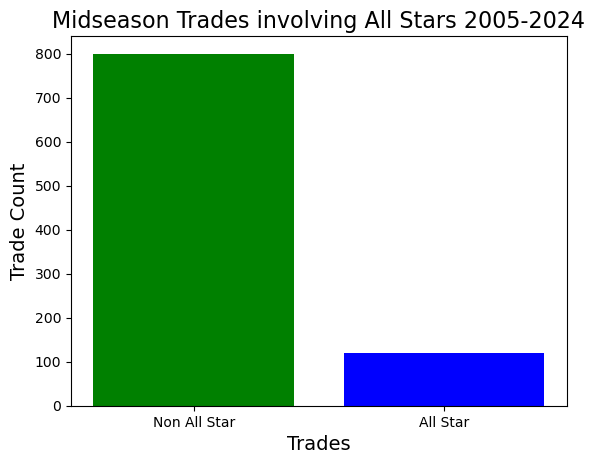

In [28]:
trades = ['Non All Star','All Star']
counts = [800,119]
colors = ['green','blue']

plt.figure()
plt.bar(trades,counts,color=colors)
plt.xlabel('Trades').set_size(14)
plt.rc('xtick', labelsize=10) 
plt.ylabel('Trade Count').set_size(14)
plt.rc('xtick', labelsize=10) 
plt.title('Midseason Trades involving All Stars 2005-2024').set_size(16)
plt.show()

When comparing this chart to the total player population, the ratio of trades involving all stars is quite similar to the ratio of players who were all stars.